In [8]:
%run "../common.ipynb"
from sklearn.linear_model import LinearRegression

TabError: inconsistent use of tabs and spaces in indentation (DataFrameUtils.py, line 82)

# Machine Learning Notes

### Introduction

What is Machine Learning?

* Supervised Learning
* Unsupervised learning 
* Classfication
* Regression
* Clustering
* Analysis 
* Parametric
* Non-parametric
----
* Feature scaling
* polynomial features

## Linear Regression

Hypothesis: $h(x) = \theta^T x = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + ... \theta_n * x_n$

$h(X) = y $

Error function $ J(\theta) = \frac{1}{2m} \sum_{i=0}^{m} (h(x_i) -y_i)^2)$

The update rule for gradient decent is,
$$\frac{\partial}{\partial\theta_{j}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i $$

Here $ h(x_i)$ is the value hypothesis function predicts

In Linear-Regression models, one hypothesizes the population is comes from a linear model. 
<br/>The learning algorithm will find a set of parameters $\theta$ such that the error function is minimized.


### Practical tips to make linear regression faster

* Use feature scaling - normalize and standardize all features between -1 and 1 (or something -3 to +3)
<br/>This will make the gradient decent runs faster
<br/>Different type is feature scalings are (normalizing) or mean normalization (divide by mean)

* Learning rate: play around the idea of learning rate - use the larger learning rate and changing when solution is converging. 
<br/>Learing rate is used to scale the value to slightly adjust the weight

* Manufacture new features 
<br/> For ex. in house prediction, instead of house length and width, you may add $ area = l \times w $
<br/> If the scatter plot is not exactly  linear, consider adding squared or cubic value of features $f = x + x^2 + x^3 + \sqrt{x}$

Intercept: 34871.6935484  Coeff:  [ 83.22]


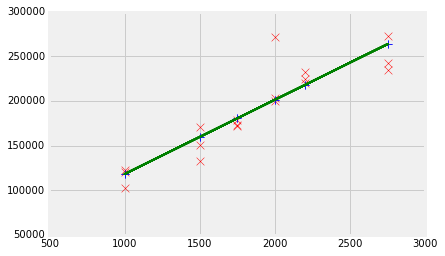

In [3]:
# Here is an example of linear regression

X = np.vstack([ 1000, 1500, 1750, 2000, 2200, 2750, 1000, 1500, 1750, 2000, 2200, 2750, 1000, 1500, 1750, 2000, 2200, 2750])
y = np.array([ 120000, 150075, 178990, 271000, 224040, 272350, 102300, 170230, 172350, 200230, 220320, 234750, 123000, 
      132300, 173250, 203700, 232200, 242750])

lm = LinearRegression()
lm.fit(X, y)

print ("Intercept:" , lm.intercept_, " Coeff: ", lm.coef_)

yp = lm.predict(X)

plt.scatter(X, y,  alpha=1, marker='x', s=60, c = 'r')
plt.scatter(X, yp, alpha=1, marker='+', s=60, c = 'b')
plt.plot(X, yp , color='g',linewidth=2)
plt.show()


<hr>
## A concrete example 

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $$10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $$1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)

In [6]:
# Concreate example of linear regression

from sklearn.datasets import load_boston

boston = load_boston()
# You can see the dcrption of the dataset by uncommenting the following line
# print (boston.DESCR)
X = boston.data
y = boston.target

df = pd.DataFrame(X, columns = boston.feature_names)
displayDFs(df)


count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.594,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,8.597,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,3.647,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970
,,,,,,,,,,,,,
,CRIM (float64),ZN (float64),INDUS (float64),CHAS (float64),NOX (float64),RM (float64),AGE (float64),DIS (float64),RAD (float64),TAX (float64),PTRATIO (float64),B (float64),LSTAT (float64)
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980


In [117]:
lm = LinearRegression()
lm.fit(X, y)
# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X, y)))

# save intercept and coefficients
param_df = pd.DataFrame({"Features": ['intercept'] + list(boston.feature_names), "Coef": [lm.intercept_] + list(lm.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
display(HTML(param_df.to_html()))

The R-squared value is: 0.7406 



,Features,Coef
0,intercept,36.491
1,CRIM,-0.107
2,ZN,0.046
3,INDUS,0.021
4,CHAS,2.689
5,NOX,-17.796
6,RM,3.805
7,AGE,0.001
8,DIS,-1.476
9,RAD,0.306


In [118]:
newX = X
newY = y

# predict and create a dataframe
predicted = lm.predict(newX)
predictedDf = pd.DataFrame({"predicted": predicted})
# dataframe for X
newXDf = pd.DataFrame(newX)
newXDf.columns = boston.feature_names
# dataframe for y
newYDf = pd.DataFrame(newY)
newYDf.columns = ['ActualY']
# join X, y and prediction
mydata_with_pd = newXDf.join(newYDf).join(predictedDf)

display(mydata_with_pd.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ActualY,predicted
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000,30.008
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600,25.030
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700,30.570
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400,28.608
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200,27.943


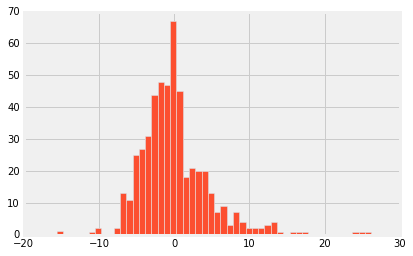

In [119]:
# I am not sure why I am plotting this
## ===========Lets make some bins depending on how far or close to real 
mydata_with_pd['diff'] = mydata_with_pd['ActualY'] - mydata_with_pd['predicted'] 
mydata_with_pd['diff'].hist(bins=50)

min = floor(mydata_with_pd['diff'].min())
max = ceil(mydata_with_pd['diff'].max())
nbins=5
bins = np.linspace(min, max, nbins, endpoint=True)
group_names = []
for i in arange(len(bins[1:])):
    group_names.append ("{} - ({} - {}] ".format(i, bins[i],  bins[i+1]))

mydata_with_pd['bins'] = pd.cut(mydata_with_pd['diff'], bins, labels=group_names)
mydata_with_pd['bins'] = mydata_with_pd['bins'].astype(str)

mydata_with_pd['diff'].hist(bins=50);

Dropping in prepareDF -  Index([], dtype='object')


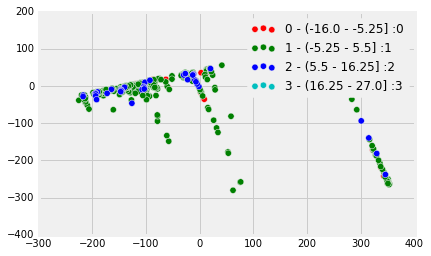

In [120]:
dfPCA=PCAPlot(mydata_with_pd, 'bins')

In [121]:
mydata_with_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ActualY,predicted,diff,bins
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000,30.008,-6.008,0 - (-16.0 - -5.25]
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600,25.030,-3.430,1 - (-5.25 - 5.5]
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700,30.570,4.130,1 - (-5.25 - 5.5]
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400,28.608,4.792,1 - (-5.25 - 5.5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080,20.600,22.379,-1.779,1 - (-5.25 - 5.5]
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640,23.900,27.629,-3.729,1 - (-5.25 - 5.5]
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480,22.000,26.130,-4.130,1 - (-5.25 - 5.5]
505,0.047,0.000,11.930,0.000,0.573,6.030,80.800,2.505,1.000,273.000,21.000,396.900,7.880,11.900,22.349,-10.449,0 - (-16.0 - -5.25]


<hr/>
## More advanced view

The following topics are more advanced and you may want to review the following material after you have become familiar with the other topics. In fact, browse through the notes and not worry about it - you can do most of linear regression without having to learn this. Having said that, you will likely have to reread materials many times before everything sinks. I had to do it many many times and even now I forget it if I don't use it for more than few weeks.

We are going to use the data used by:
http://connor-johnson.com/2014/02/18/linear-regression-with-python/

This is data from a British government survey of household spending may be used to examine the relationship between household spending on tobacco products and alcholic beverages. 

'''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East Midlands 4.89 3.34
West Midlands 5.63 3.47
East Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern Ireland 4.02 4.56'''



Intercept: 4.35116848605  Coeff:  [ 0.3]


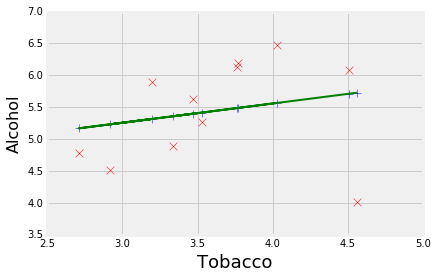

In [65]:
%run "../common.ipynb"

data='''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East-Midlands 4.89 3.34
West-Midlands 5.63 3.47
East-Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern-Ireland 4.02 4.56'''

df  = LoadDataSet(data, seperator=" ");
df['Alcohol']=df.Alcohol.astype(float)
df['Tobacco']=df.Tobacco.astype(float)

X=df[['Tobacco']].as_matrix()
y=df.Alcohol.values

## -----
lm = LinearRegression()
lm.fit(X, y)

print ("Intercept:" , lm.intercept_, " Coeff: ", lm.coef_)

yp = lm.predict(h)

plt.scatter(X, y,  alpha=1, marker='x', s=60, c = 'r')
plt.scatter(X, yp, alpha=1, marker='+', s=60, c = 'b')
plt.plot(X, yp , color='g',linewidth=2)
plt.xlabel('Tobacco', fontsize=18)
plt.ylabel('Alcohol', fontsize=16)


In [68]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

result = sm.OLS( y, X ).fit()
result.summary()

/Users/snarayan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     292.9
Date:                Thu, 16 Jun 2016   Prob (F-statistic):           9.79e-09
Time:                        07:40:13   Log-Likelihood:                -15.595
No. Observations:                  11   AIC:                             33.19
Df Residuals:                      10   BIC:                             33.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4761      0.086     17.113      0.000         1.284     1.668
==============================================================================
Omnibus:                       17.342   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.940
Skew:                          -1.917   Prob(JB):                      0.00421
Kurtosis:                       6.028   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""